In [1]:

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymongo
import seaborn as sns


In [2]:
def mongoimport(csv_path):
    hr_df=pd.read_csv(csv_path)
    payload=json.loads(hr_df.to_json(orient="records"))
    collection.delete_many({})

    collection.insert_many(payload)
    



#### a. Create collections “flights” inside database “airline_delayDB”


In [3]:

if __name__ == "__main__":
    client = pymongo.MongoClient("mongodb://localhost:27017")
    print(client)
    db=client['Airline_delayDB']
    collection=db['Flights']
    mongoimport("C:/Users/anu/Documents/python programs/Data/Flights_Delay.csv")


MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)


#### b. Average arrival delay caused by airlines

In [4]:
    avg_Arrival_Delay=collection.aggregate([{ '$group' :{'_id' : '$null', 'Avg_Arrival_Delay':{'$avg' : '$ARRIVAL_DELAY'}}}
                                    ,{ '$project' : { '_id' : 0 ,}}])
    for item in avg_Arrival_Delay:
        print("Average Arrival Delay:",np.round(item['Avg_Arrival_Delay'],2))

Average Arrival Delay: 7.55


#### c. Days of months with respect to average of arrival delays. [Create a suitable plot using matplotlib/seaborn]

,_id,Avg_Arrival_Delay
0,30,4.471478
1,12,11.248927
2,26,11.967783
3,28,3.257426
4,22,6.550920
5,17,8.761436
6,13,3.376975
7,15,2.966754
8,1,14.807808
9,23,4.207086


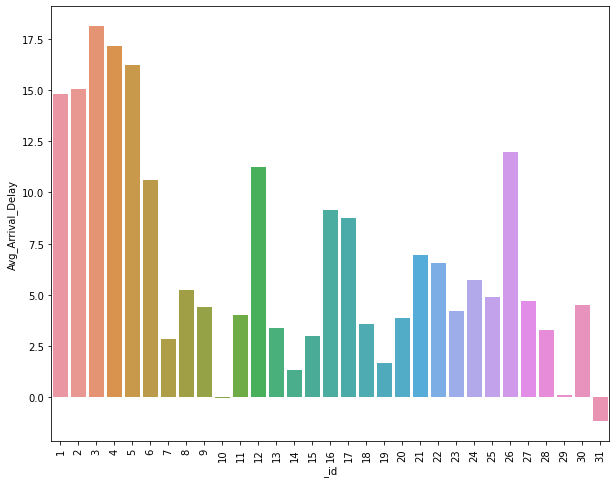

In [5]:
    avg_Arrival_Delay=collection.aggregate([{ '$group' :{'_id' : '$DAY', 'Avg_Arrival_Delay':{'$avg' : '$ARRIVAL_DELAY'}}}])   
    df=pd.DataFrame(avg_Arrival_Delay)
    display(df)  
    
    plt.figure(figsize = (10,8))
    sns.barplot(x=df['_id'],y=df['Avg_Arrival_Delay'])
    plt.xticks(rotation = 90)
    plt.show()



#### d.Arrange weekdays with respect to the average arrival delays caused. [Create a suitable plot using matplotlib/seaborn]

   _id  Avg_Arrival_Delay
0    2           8.033644
1    3           5.587079
2    1          10.807447
3    5           6.010538
4    6           4.888689
5    4           7.174969
6    7          10.110840


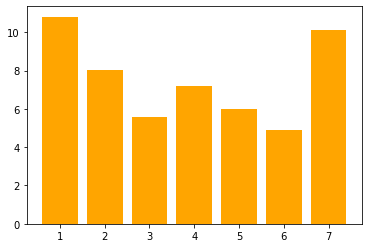

In [6]:
    avg_Arrival_Delay=collection.aggregate([{ '$group' :{'_id' : '$DAY_OF_WEEK', 'Avg_Arrival_Delay':{'$avg' : '$ARRIVAL_DELAY'}}}])   
    df=pd.DataFrame(avg_Arrival_Delay)
    print(df)
    plt.bar(df['_id'], df['Avg_Arrival_Delay'],color='orange')
    plt.show()

#### e.Arrange Days of month as per cancellations done in descending order.  [Create a suitable plot using matplotlib/seaborn]

    _id  Cancellation
0    31             9
1    30             7
2    29             3
3    28            98
4    27           185
5    26           114
6    25            61
7    24            57
8    23            69
9    22            41
10   21            61
11   20            21
12   19             9
13   18            14
14   17            59
15   16            63
16   15            83
17   14            30
18   13            14
19   12            20
20   11            24
21   10            27
22    9            89
23    8            61
24    7            31
25    6            53
26    5           215
27    4           113
28    3            88
29    2           195
30    1           237


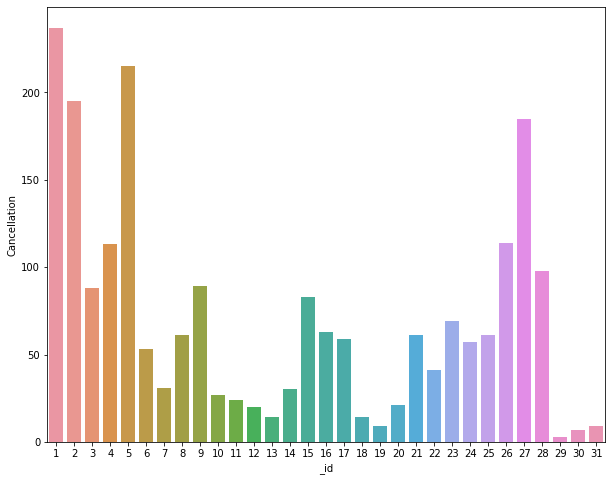

In [7]:
    cancellation=collection.aggregate([{ '$match':{'CANCELLED':1}},
                                       { '$group' :{'_id' : '$DAY', 'Cancellation':{'$count' : {}}}},
                                       { '$sort':{"_id":-1}}])   
    df=pd.DataFrame(cancellation)
    print(df)
 
    plt.figure(figsize = (10,8))
    sns.barplot(x=df['_id'],y=df['Cancellation'])
    plt.show()

#### f.Find the busiest airports with respect to day of week. Create a suitable plot using matplotlib/seaborn.

In [28]:
#     busy_airport=collection.aggregate([ {'$group' :{'_id' : '$DAY_OF_WEEK', 'Arrival_count':{'$count' : {}},'Depart_count':{'$count' : {}}}}])   
#     df=pd.DataFrame(busy_airport)
#     df

arrival_airport_count=collection.aggregate([{'$group':{'_id':'$DAY_OF_WEEK','count':{'$count':{}}}},
                                            {'$sort':{'DESTINATION_AIRPORT': -1}}])
        
departure_airport_count = collection.aggregate([{'$group':{'_id':'$DAY_OF_WEEK','count':{'$count':{}}}},
                                             {'$sort':{'ORIGIN_AIRPORT': -1}}])
    
    
    
arrival_airport_count_df=pd.DataFrame(arrival_airport_count)
departure_airport_count_df=pd.DataFrame(departure_airport_count)
print(arrival_airport_count_df)
print(departure_airport_count_df)


   _id  count
0    5   8886
1    4   8395
2    7   7827
3    2   7785
4    6   6884
5    3   7684
6    1   8539
   _id  count
0    5   8886
1    6   6884
2    1   8539
3    3   7684
4    2   7785
5    7   7827
6    4   8395


#### g.Find top 10 Airlines of US. Create a suitable plot using matplotlib/seaborn.

0    1898
1    1735
2     628
3     621
4    1925
5    1810
6     425
7     695
8    1854
9     649
Name: _id, dtype: int64

<AxesSubplot: xlabel='_id', ylabel='count'>

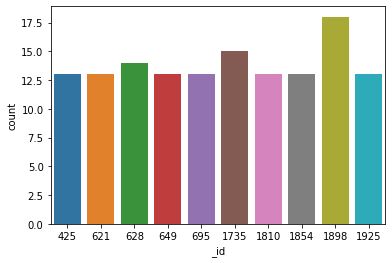

In [9]:
    airlines_us=collection.aggregate([{ '$match':{'AIRLINE':"US"}},
                                            {'$group' :{'_id' : '$FLIGHT_NUMBER', 'count':{'$count' : {}}}},
                                            {'$sort':{'count':-1}},
                                            {'$limit':10}]) 
    
    df=pd.DataFrame(airlines_us)
    display(df['_id'])
    sns.barplot(x=df['_id'],y=df['count'])
#     plt.bar(df["_id"].apply(str),df["count"],color='orangered')

        

#### h.Finding airlines that make the maximum, minimum number of cancellations.

In [10]:
    max_cancel=collection.aggregate([{'$match':{'CANCELLED':1}},
                                     {'$group' :{'_id' : '$AIRLINE', 'count':{'$count':{}}}},
                                     {'$sort':{'count':-1}},
                                     {'$limit':1}]) 
    for item in max_cancel:
        print("Airline ",item['_id']," make maximum number of cancellation: ",item['count'])

    min_cancel=collection.aggregate([{'$match':{'CANCELLED':1}},
                                     {'$group' :{'_id' : '$AIRLINE', 'count':{'$count':{}}}},
                                     {'$sort':{'count':1}},
                                     {'$limit':1} ])
    for item in min_cancel:
        print("Airline ",item['_id']," make minimum number of cancellation: ",item['count'])

Airline  MQ  make maximum number of cancellation:  414
Airline  HA  make minimum number of cancellation:  3


#### i.Find and show airlines names in descending that make the most number of diversions made. [Create a suitable plot using matplotlib/seaborn]

,_id,count
0,WN,35
1,OO,25
2,EV,22
3,DL,18
4,B6,16
5,AA,12
6,US,9
7,UA,8
8,MQ,5
9,HA,1


<BarContainer object of 10 artists>

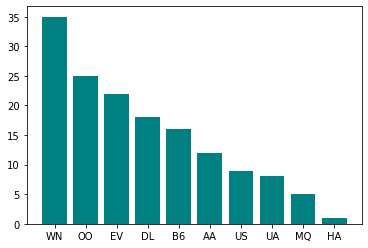

In [11]:
    max_div=collection.aggregate([{'$match':{'DIVERTED':1}},
                                     {'$group' :{'_id' : '$AIRLINE', 'count':{'$count':{}}}},
                                     {'$sort':{'count':-1}}]) 

    
    df=pd.DataFrame(max_div)
    display(df)
    plt.bar(df['_id'], df['count'],color='teal')
    
    

####  j.Finding days of month that see the most number of diversion

In [12]:
    max_div=collection.aggregate([{'$match':{'DIVERTED':1}},
                                     {'$group' :{'_id' : '$DAY', 'count':{'$count':{}}}},
                                     {'$sort':{'count':-1}},
                                 {'$limit':1}]) 
    for item in max_div:
        print("Day of month:",item['_id'] ,"\nNumber of Division:",item['count'])

Day of month: 2 
Number of Division: 15


#### k.Calculating mean and standard deviation of departure delay for all flights in minutes

In [13]:
    #Method 1
    depart_delay=collection.find({},{"DEPARTURE_DELAY":1})
    df=pd.DataFrame(depart_delay)
    #display(df)
    print("Mean of Departure delay:",df['DEPARTURE_DELAY'].mean())
    print("Standard Deviation of Departure delay:",df['DEPARTURE_DELAY'].std())

Mean of Departure delay: 11.329091145205275
Standard Deviation of Departure delay: 39.62091603371564


In [14]:
    #Method 2
    depart_delay=collection.aggregate([{'$group' :{'_id' : '$null', 'std':{'$stdDevPop':'$DEPARTURE_DELAY'},'mean':{'$avg':'$DEPARTURE_DELAY'}}}]) 
    for i in depart_delay:
        print("Mean of Departure delay:",i['mean'])
        print("Standard Deviation of Departure delay:",i['std'])

Mean of Departure delay: 11.329091145205275
Standard Deviation of Departure delay: 39.620548511500886


#### l.Calculating mean and standard deviation of arrival delay for all flights in minutes

In [15]:
    #Method 1
    arrival_delay=collection.find({},{"ARRIVAL_DELAY":1})
    df=pd.DataFrame(arrival_delay)
    print("Mean of arrival_delay:",df['ARRIVAL_DELAY'].mean())
    print("Standard deviation of arrival_delay:",df['ARRIVAL_DELAY'].std())


Mean of arrival_delay: 7.545457931394093
Standard deviation of arrival_delay: 42.378385824632446


In [16]:
    #Method 2
    arrival_delay=collection.aggregate([{'$group' :{'_id' : '$null', 'std':{'$stdDevPop':'$ARRIVAL_DELAY'},'mean':{'$avg':'$ARRIVAL_DELAY'}}}]) 
    for i in arrival_delay:
        print("Mean of arrival_delay:",i['mean'])
        print("Standard deviation of arrival_delay:",i['std'])

Mean of arrival_delay: 7.545457931394093
Standard deviation of arrival_delay: 42.37799122350079


#### m.Create a partitioning table “flights_partition” using partitioned by schema “CANCELLED”

#### n.Finding all diverted Route from a source to destination Airport & which route is the most diverted route.

In [17]:
    diverted_route=collection.aggregate([{'$match':{'DIVERTED':1}},
                                         {'$group' :{'_id' : {'ORIGIN_AIRPORT':'$ORIGIN_AIRPORT',"DESTINATION_AIRPORT":'$DESTINATION_AIRPORT'}, 'count':{'$sum':1}}},
                                         {'$sort':{'count':-1}}
                                         ]) 
    df=pd.DataFrame(diverted_route)
    print("Diverted Route from a source to destination Airport \n",df['_id'])
    diverted_max=df.get('count').max()
    print("\n\n")
    
    print("Most diverted Route from a source to destination Airport \n",df[df['count']==diverted_max]['_id'])
#     for i in diverted_route:
#         print(i)

Diverted Route from a source to destination Airport 
 0      {'ORIGIN_AIRPORT': 'JFK', 'DESTINATION_AIRPORT...
1      {'ORIGIN_AIRPORT': 'HOU', 'DESTINATION_AIRPORT...
2      {'ORIGIN_AIRPORT': 'IAH', 'DESTINATION_AIRPORT...
3      {'ORIGIN_AIRPORT': 'TPA', 'DESTINATION_AIRPORT...
4      {'ORIGIN_AIRPORT': 'ORD', 'DESTINATION_AIRPORT...
                             ...                        
137    {'ORIGIN_AIRPORT': 'IAH', 'DESTINATION_AIRPORT...
138    {'ORIGIN_AIRPORT': 'MSP', 'DESTINATION_AIRPORT...
139    {'ORIGIN_AIRPORT': 'ASE', 'DESTINATION_AIRPORT...
140    {'ORIGIN_AIRPORT': 'MSY', 'DESTINATION_AIRPORT...
141    {'ORIGIN_AIRPORT': 'CLT', 'DESTINATION_AIRPORT...
Name: _id, Length: 142, dtype: object



Most diverted Route from a source to destination Airport 
 0    {'ORIGIN_AIRPORT': 'JFK', 'DESTINATION_AIRPORT...
1    {'ORIGIN_AIRPORT': 'HOU', 'DESTINATION_AIRPORT...
2    {'ORIGIN_AIRPORT': 'IAH', 'DESTINATION_AIRPORT...
3    {'ORIGIN_AIRPORT': 'TPA', 'DESTINATION_AIRPORT...

In [18]:
    diverted_route=collection.find({'DIVERTED':1},{"_id":0,"ORIGIN_AIRPORT":1,'DESTINATION_AIRPORT':1})
    df=pd.DataFrame(diverted_route)
    diverted_routes=df.groupby(['ORIGIN_AIRPORT','DESTINATION_AIRPORT']).value_counts()
    print(diverted_routes.sort_values(ascending=False))



ORIGIN_AIRPORT  DESTINATION_AIRPORT
ORD             ASE                    2
TPA             LGA                    2
JFK             SEA                    2
STT             PHL                    2
JFK             EGE                    2
                                      ..
DFW             BPT                    1
DEN             OGG                    1
                JAC                    1
                COD                    1
TPA             MKE                    1
Length: 142, dtype: int64


#### o.When is the best time of day/day of week/time of a year to fly with minimum delays?

In [19]:
    min_busy=collection.aggregate([{'$match':{'$or':[{'DEPARTURE_DELAY':{'$exists':'true'}},{'ARRIVAL_DELAY':{'$exists':'true'}}]}},
                                   {'$project' :{'_id' : {'day':"$DAY",'year': "$YEAR" }, 'delay_sum':{'$add':['$DEPARTURE_DELAY','$ARRIVAL_DELAY']}}},
                                  
                                    {'$sort':{'delay_sum':1}}]) 
    for i in min_busy:
        print(i)
    

{'_id': {'day': 2, 'year': 2015}, 'delay_sum': None}
{'_id': {'day': 27, 'year': 2015}, 'delay_sum': None}
{'_id': {'day': 4, 'year': 2015}, 'delay_sum': None}
{'_id': {'day': 6, 'year': 2015}, 'delay_sum': None}
{'_id': {'day': 23, 'year': 2015}, 'delay_sum': None}
{'_id': {'day': 18, 'year': 2015}, 'delay_sum': None}
{'_id': {'day': 23, 'year': 2015}, 'delay_sum': None}
{'_id': {'day': 4, 'year': 2015}, 'delay_sum': None}
{'_id': {'day': 27, 'year': 2015}, 'delay_sum': None}
{'_id': {'day': 27, 'year': 2015}, 'delay_sum': None}
{'_id': {'day': 4, 'year': 2015}, 'delay_sum': None}
{'_id': {'day': 22, 'year': 2015}, 'delay_sum': None}
{'_id': {'day': 1, 'year': 2015}, 'delay_sum': None}
{'_id': {'day': 6, 'year': 2015}, 'delay_sum': None}
{'_id': {'day': 22, 'year': 2015}, 'delay_sum': None}
{'_id': {'day': 15, 'year': 2015}, 'delay_sum': None}
{'_id': {'day': 7, 'year': 2015}, 'delay_sum': None}
{'_id': {'day': 15, 'year': 2015}, 'delay_sum': None}
{'_id': {'day': 12, 'year': 2015}, '